<a href="https://colab.research.google.com/github/vvvipindsm/Deep-Learning-for-Candle-Stick-Patterns-Identification/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
import yfinance as yf
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from scipy.stats import pearsonr


In [4]:
start_date_string = "2015-01-09" # some made up dates
end_date_string = "2024-01-01"
#changes the name from yahoo finance
ticker_name = "TATACHEM.NS"
data = yf.download(ticker_name, start=start_date_string,end=end_date_string,interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-09,196.155197,197.962875,193.774353,194.898636,142.196259,1313834
2015-01-12,195.185226,195.956802,192.694153,193.906616,141.472519,451177
2015-01-13,194.876602,200.167358,193.421631,197.455841,144.061981,1255696
2015-01-14,197.742432,201.357788,194.766373,195.339539,142.517975,1545545
2015-01-15,198.403778,200.145325,195.008865,196.552002,143.402527,944403
...,...,...,...,...,...,...
2023-12-22,1016.000000,1041.000000,1012.500000,1022.049988,1022.049988,1179769
2023-12-26,1027.000000,1102.000000,1020.700012,1094.250000,1094.250000,7243281
2023-12-27,1100.000000,1102.849976,1077.150024,1089.849976,1089.849976,1984857


In [7]:
#return
ret = data.Close.pct_change().dropna()
ret.head()

Date
2015-01-12   -0.005090
2015-01-13    0.018304
2015-01-14   -0.010718
2015-01-15    0.006207
2015-01-16   -0.003925
Name: Close, dtype: float64

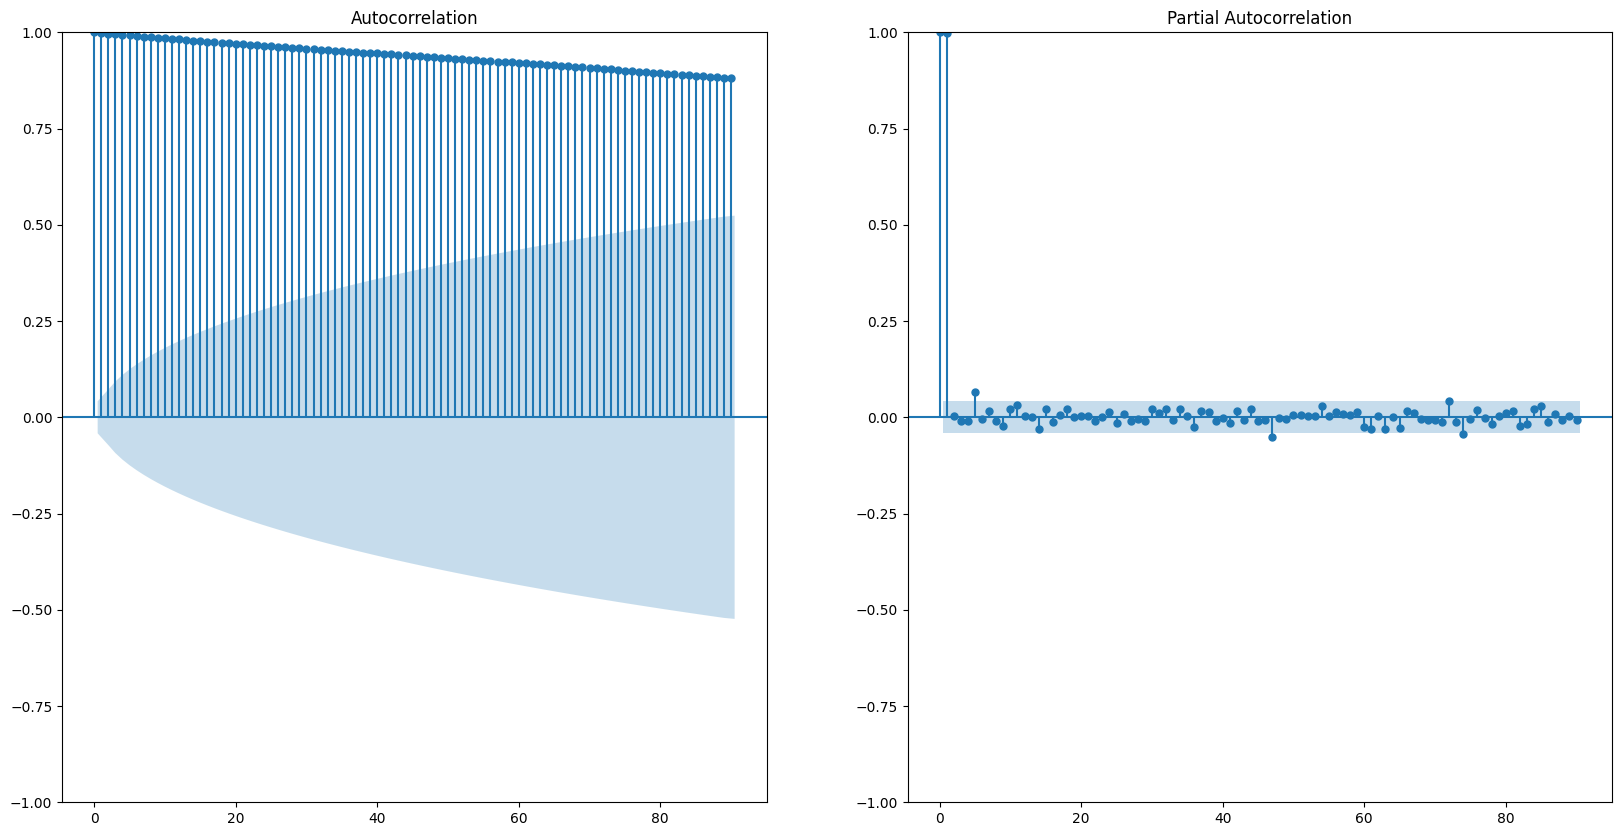

In [8]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sm.graphics.tsa.plot_acf(data.Close.values.squeeze(), lags=90, ax=ax[0])
sm.graphics.tsa.plot_pacf(data.Close.values.squeeze(), lags=90, ax=ax[1])
plt.show()

In [11]:
#prophet model integration
df_time_series = data
df_time_series.reset_index(inplace=True)

df_time_series = df_time_series.rename(columns = {'Close': 'y',
                     'Date': 'ds'})
# nifty_day_df.reset_index(inplace=True)
df_time_series

,level_0,index,ds,Open,High,Low,y,Adj Close,Volume
0,0,0,2015-01-09,196.155197,197.962875,193.774353,194.898636,142.196259,1313834
1,1,1,2015-01-12,195.185226,195.956802,192.694153,193.906616,141.472519,451177
2,2,2,2015-01-13,194.876602,200.167358,193.421631,197.455841,144.061981,1255696
3,3,3,2015-01-14,197.742432,201.357788,194.766373,195.339539,142.517975,1545545
4,4,4,2015-01-15,198.403778,200.145325,195.008865,196.552002,143.402527,944403
...,...,...,...,...,...,...,...,...,...
2210,2210,2210,2023-12-22,1016.000000,1041.000000,1012.500000,1022.049988,1022.049988,1179769
2211,2211,2211,2023-12-26,1027.000000,1102.000000,1020.700012,1094.250000,1094.250000,7243281
2212,2212,2212,2023-12-27,1100.000000,1102.849976,1077.150024,1089.849976,1089.849976,1984857
2213,2213,2213,2023-12-28,1094.699951,1095.000000,1079.050049,1086.599976,1086.599976,1387134


In [12]:
m = Prophet(
            #holidays = holidays,
            #seasonality_mode = 'multiplicative',
           # seasonality_prior_scale = 20,
            #changepoint_prior_scale = 0.1,
           # holidays_prior_scale = 10
           )
#m.add_regressor('Christmas')
m.fit(df_time_series)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedojqfey/fz5lb2b3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpedojqfey/tcfi58qi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65612', 'data', 'file=/tmp/tmpedojqfey/fz5lb2b3.json', 'init=/tmp/tmpedojqfey/tcfi58qi.json', 'output', 'file=/tmp/tmpedojqfey/prophet_modelmaytwuwf/prophet_model-20240226055805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:58:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:58:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
prophet_model_result = m.predict(df_time_series)

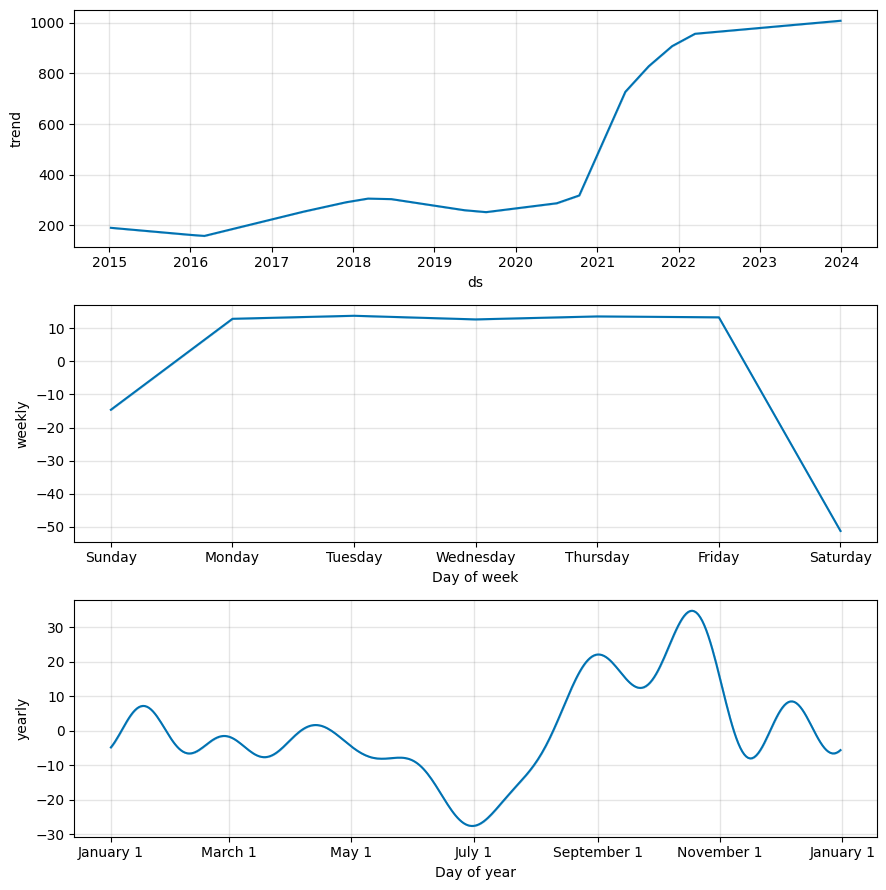

In [14]:
m.plot_components(prophet_model_result);

<Axes: ylabel='Frequency'>

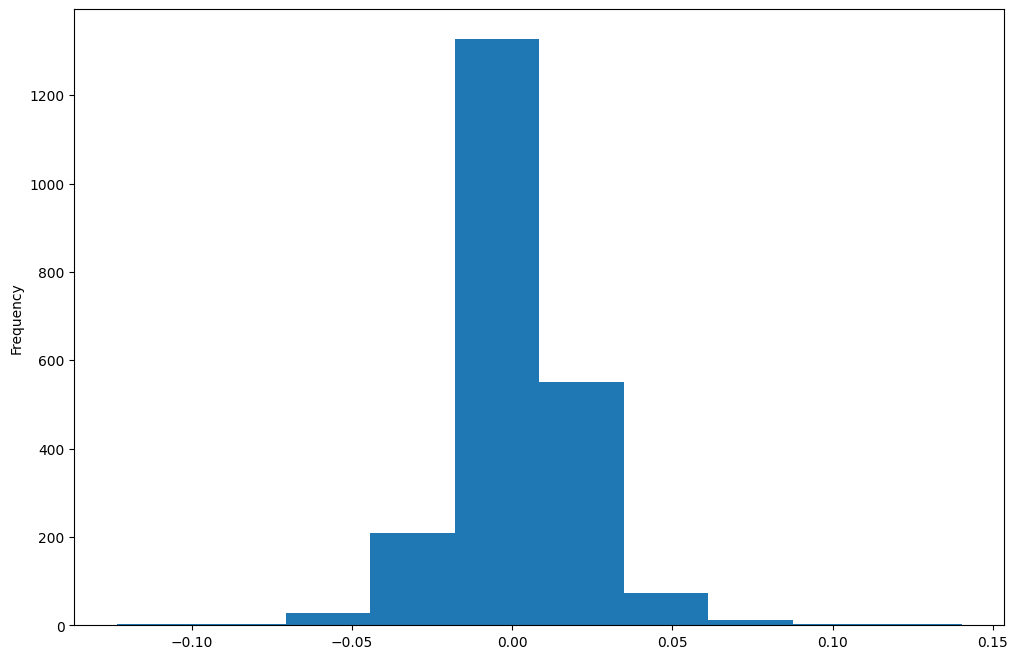

In [15]:
ret.plot(kind="hist",figsize=(12,8),bins=10)

<Axes: xlabel='Close'>

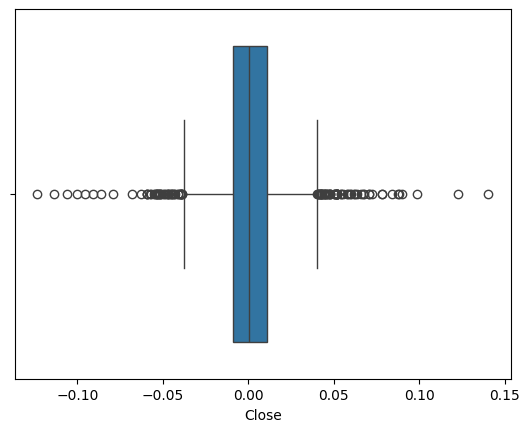

In [16]:
sns.boxplot(x=ret)


In [17]:
q_low = ret.quantile(0.01)
q_hi  = ret.quantile(0.99)

df_filtered = ret[(ret < q_hi) & (ret > q_low)]

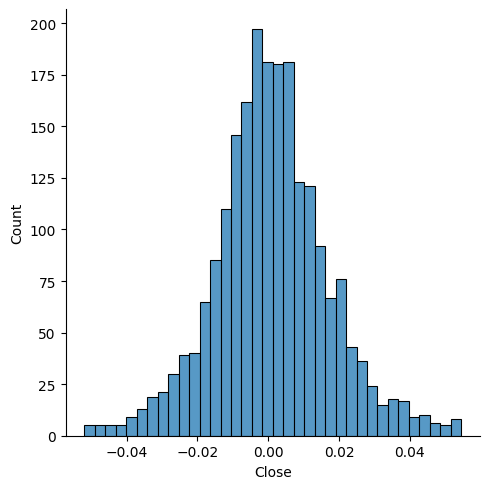

In [18]:
sns.displot(df_filtered)
plt.show()

In [ ]:
print("Total days",len(ret))

Total days 5491


In [21]:
# prompt: api

# You have not provided any context for the API call. Please provide more information about the API you want to call, such as the library or module it belongs to, the function name, and the required arguments.

# Here is an example of how to call an API with Python:

import requests

# Replace this with the actual API endpoint URL
api_endpoint = "http://score.it.nfl-nzr.com/get_stock_score/"+ticker_name

# Replace these with the actual API parameters
params = {}

# Send a GET request to the API endpoint
response = requests.get(api_endpoint, params=params)

# Print the response data
print(response.json())
resp = response.json()

for  row in resp['scores']:
  print(row)


{'scores': [{'Comments': '', 'Score': 0.503, 'ScoreName': 'Overall Score'}, {'Comments': '', 'Score': 0.29000000000000004, 'ScoreName': 'Fundamental Score'}, {'Comments': '', 'Score': 5, 'ScoreName': 'Risk Score'}, {'Comments': '', 'Score': 0.7, 'ScoreName': 'PEG Score'}], 'ticker': 'TATACHEM.NS'}
